# 평균이동법, 지수평활법, 분해시계열 (모듈)

## #01. 작업준비

### 1) 패키지 가져오기

In [23]:
import warnings
warnings.filterwarnings(action='ignore')

from hossam.util import *
from hossam.plot import *
from hossam.timeserise import *

### 2) 데이터 가져오기

월간 항공 승객 수

In [24]:
origin = my_read_excel("https://data.hossam.kr/tsdata/air_passengers.xlsx", index_col="Month", info=False)

## #02. 데이터 전처리 - 차분

정상성을 확보할 때 까지 차분을 수행한다.

=========== 원본 데이터 ===========


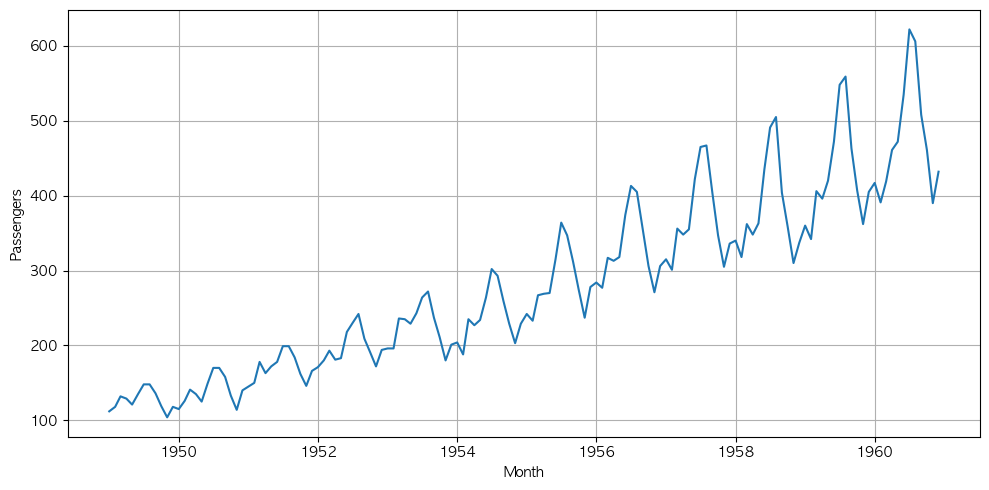

+----------------------------------+---------------------+
|                                  | ADF Test            |
|----------------------------------+---------------------|
| 검정통계량(ADF Statistic)        | 0.8153688792060447  |
| 유의수준(p-value)                | 0.9918802434376409  |
| 최적차수(num of lags)            | 13                  |
| 관측치 개수(num of observations) | 130                 |
| 기각값(Critical Values) 1%       | -3.4816817173418295 |
| 기각값(Critical Values) 5%       | -2.8840418343195267 |
| 기각값(Critical Values) 10%      | -2.578770059171598  |
| 데이터 정상성 여부               | 비정상              |
+----------------------------------+---------------------+
=========== 1차 차분 데이터 ===========


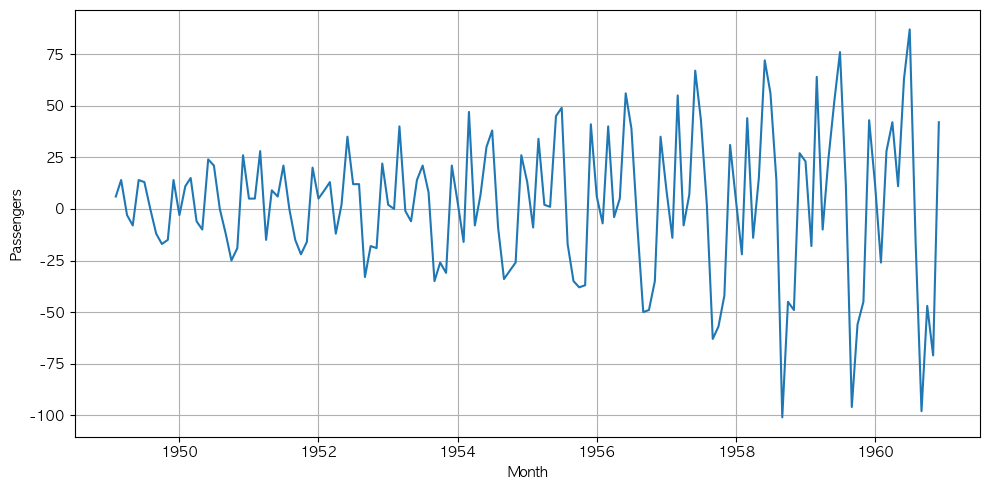

+----------------------------------+----------------------+
|                                  | ADF Test             |
|----------------------------------+----------------------|
| 검정통계량(ADF Statistic)        | -2.8292668241699794  |
| 유의수준(p-value)                | 0.054213290283828236 |
| 최적차수(num of lags)            | 12                   |
| 관측치 개수(num of observations) | 130                  |
| 기각값(Critical Values) 1%       | -3.4816817173418295  |
| 기각값(Critical Values) 5%       | -2.8840418343195267  |
| 기각값(Critical Values) 10%      | -2.578770059171598   |
| 데이터 정상성 여부               | 비정상               |
+----------------------------------+----------------------+
=========== 2차 차분 데이터 ===========


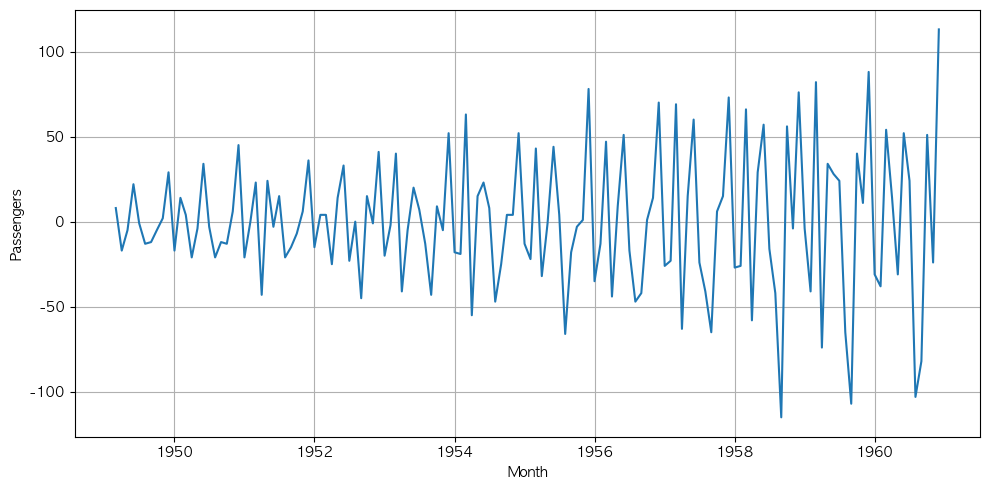

+----------------------------------+-----------------------+
|                                  | ADF Test              |
|----------------------------------+-----------------------|
| 검정통계량(ADF Statistic)        | -16.38423154246855    |
| 유의수준(p-value)                | 2.732891850013928e-29 |
| 최적차수(num of lags)            | 11                    |
| 관측치 개수(num of observations) | 130                   |
| 기각값(Critical Values) 1%       | -3.4816817173418295   |
| 기각값(Critical Values) 5%       | -2.8840418343195267   |
| 기각값(Critical Values) 10%      | -2.578770059171598    |
| 데이터 정상성 여부               | 정상                  |
+----------------------------------+-----------------------+
+---------------------+--------------+
| Month               |   Passengers |
|---------------------+--------------|
| 1949-03-01 00:00:00 |            8 |
| 1949-04-01 00:00:00 |          -17 |
| 1949-05-01 00:00:00 |           -5 |
| 1949-06-01 00:00:00 |           22 |
| 1949-07-01 00:00:00 |         

In [25]:
diff_df = my_diff(origin, 'Passengers')
my_pretty_table(diff_df.head())

## #03. 평균이동법

### [1] 차분되지 않은 원본에 대한 3개월, 6개월, 9개월 평균

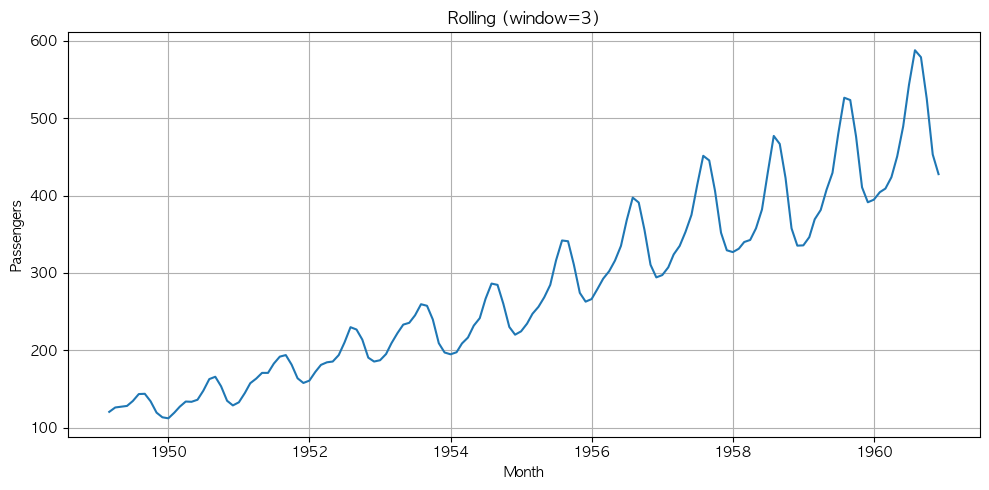

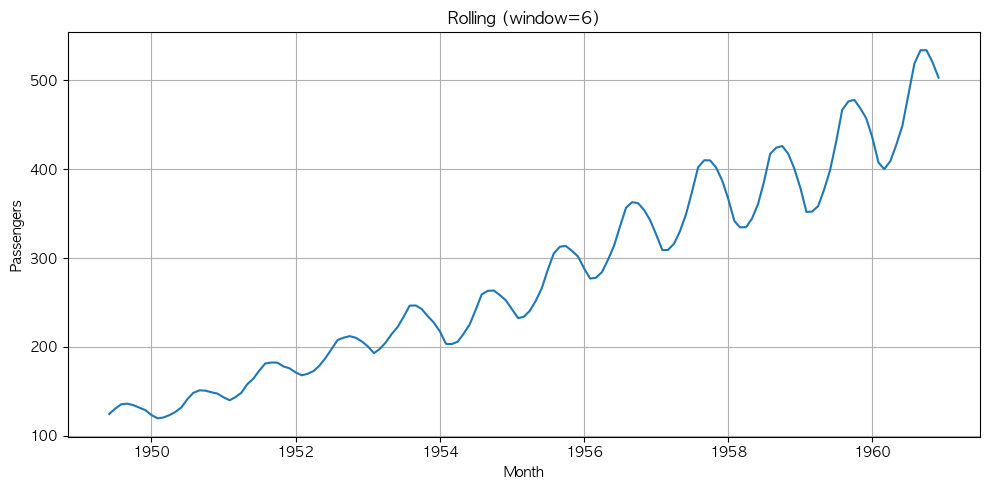

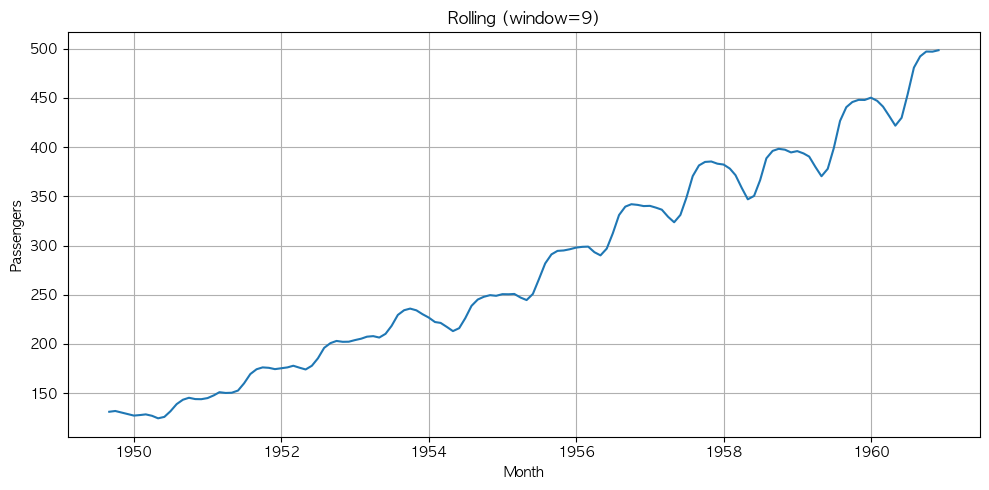

In [26]:
month3 = my_rolling(origin['Passengers'], window=3)
month6 = my_rolling(origin['Passengers'], window=6)
month9 = my_rolling(origin['Passengers'], window=9)

> 데이터의 평균을 이동하여 점점 더 그래프가 단순해 진다. 이를 통해 월별 승객 수가 꾸준히 증가하는 추세라는 것을 알 수 있다.
>
> 원본 데이터로 확인할 경우 전반적인 경향을 알 수 있다.

### [2] 차분된 데이터 대한 3개월, 6개월, 9개월 평균

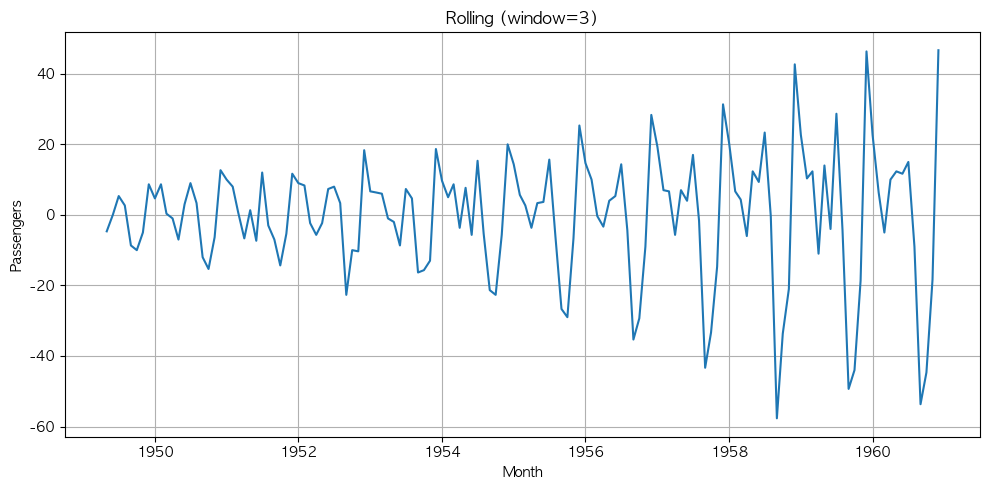

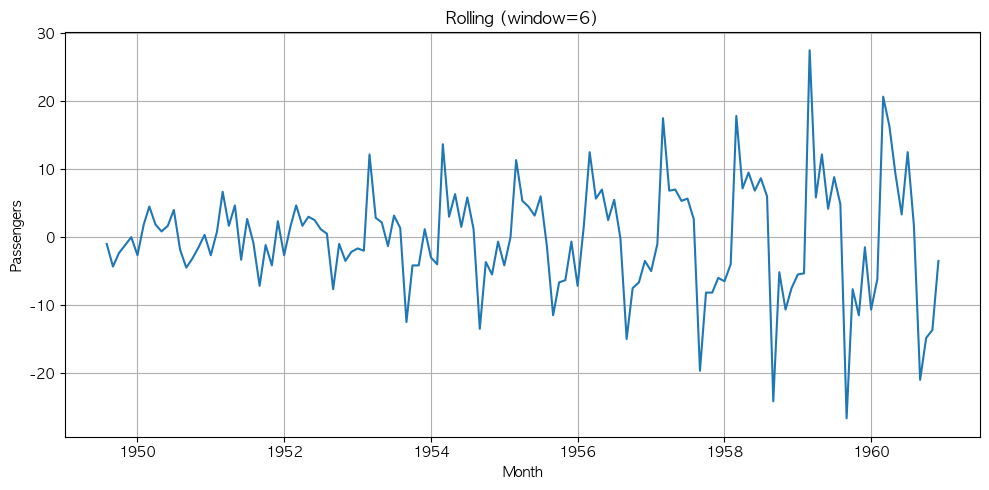

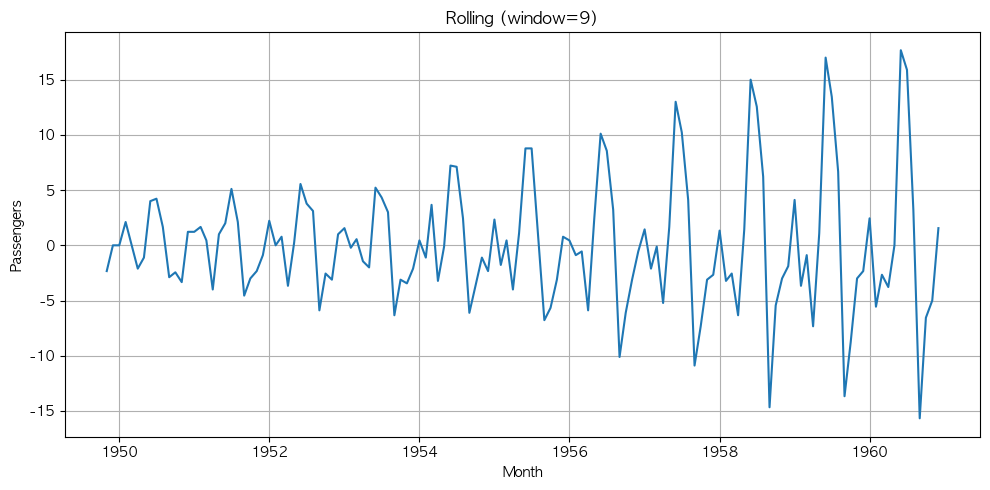

In [27]:
month3 = my_rolling(diff_df['Passengers'], window=3)
month6 = my_rolling(diff_df['Passengers'], window=6)
month9 = my_rolling(diff_df['Passengers'], window=9)

> 평균이동을 할 수록 그래프가 단순해 져서 6개월 주기로 증감을 반복하는 트렌드가 있음을 알 수 있다.

## #04. 지수평활법

보다 최근의 값에 가중치를 두면서 이동평균을 계산하는 방법

### (1) 원본에 대한 지수평활법

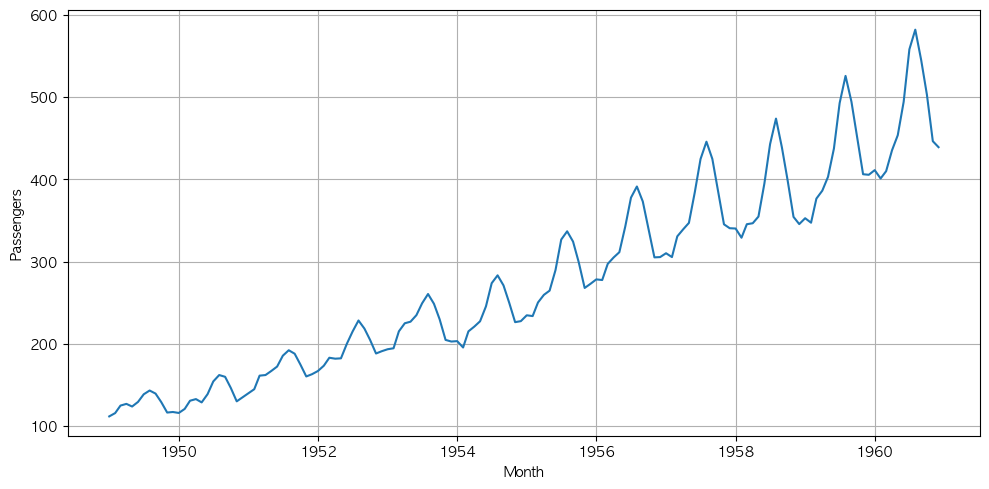

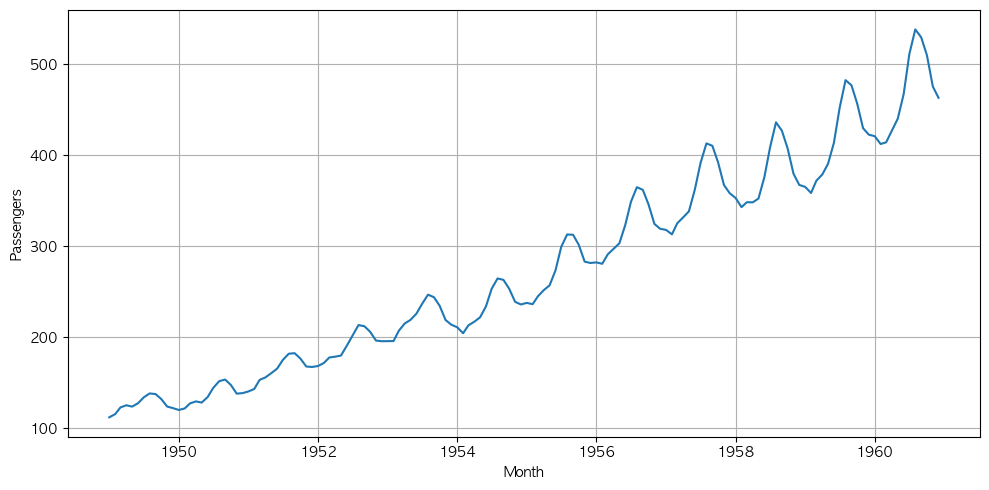

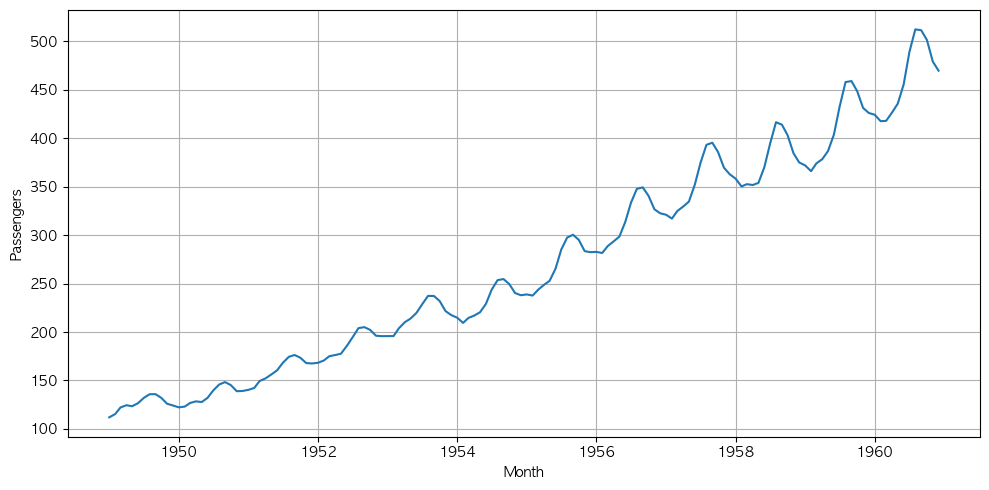

In [28]:
ewm3 = my_ewm(origin['Passengers'], span=3)
ewm6 = my_ewm(origin['Passengers'], span=6)
ewm9 = my_ewm(origin['Passengers'], span=9)

### (2) 차분 결과에 대한 지수평활법

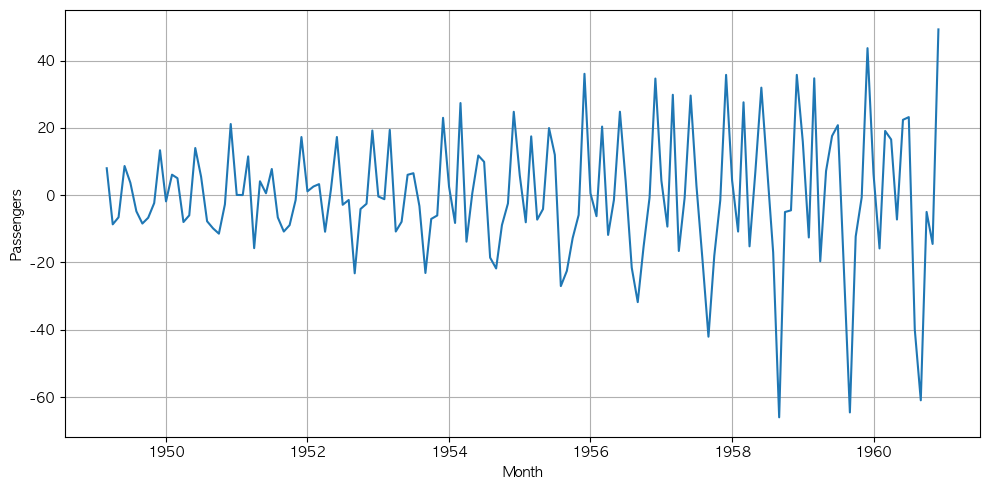

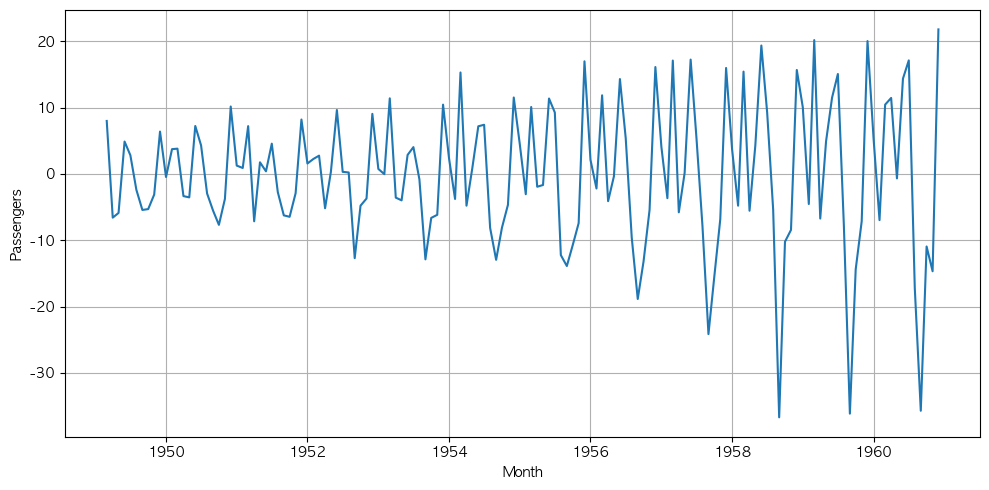

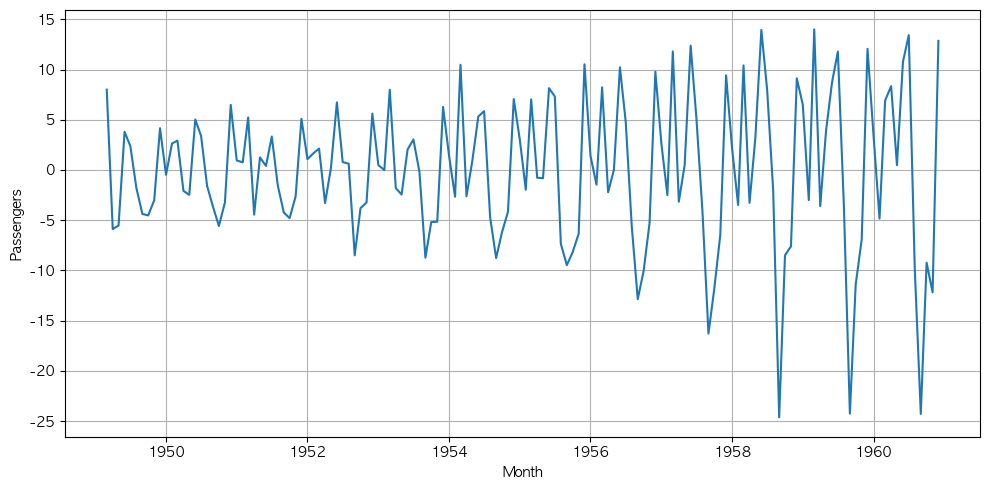

In [29]:
ewm3 = my_ewm(diff_df['Passengers'], span=3)
ewm6 = my_ewm(diff_df['Passengers'], span=6)
ewm9 = my_ewm(diff_df['Passengers'], span=9)

> 평균이동법과 지수평활법은 시각화 결과물을 분석가의 주관대로 해석하는 방법이므로 추론통계보다는 탐색적 데이터 분석 과정에 더 가깝다.

## #05. 분해시계열

### [1] 분해 시계열 생성

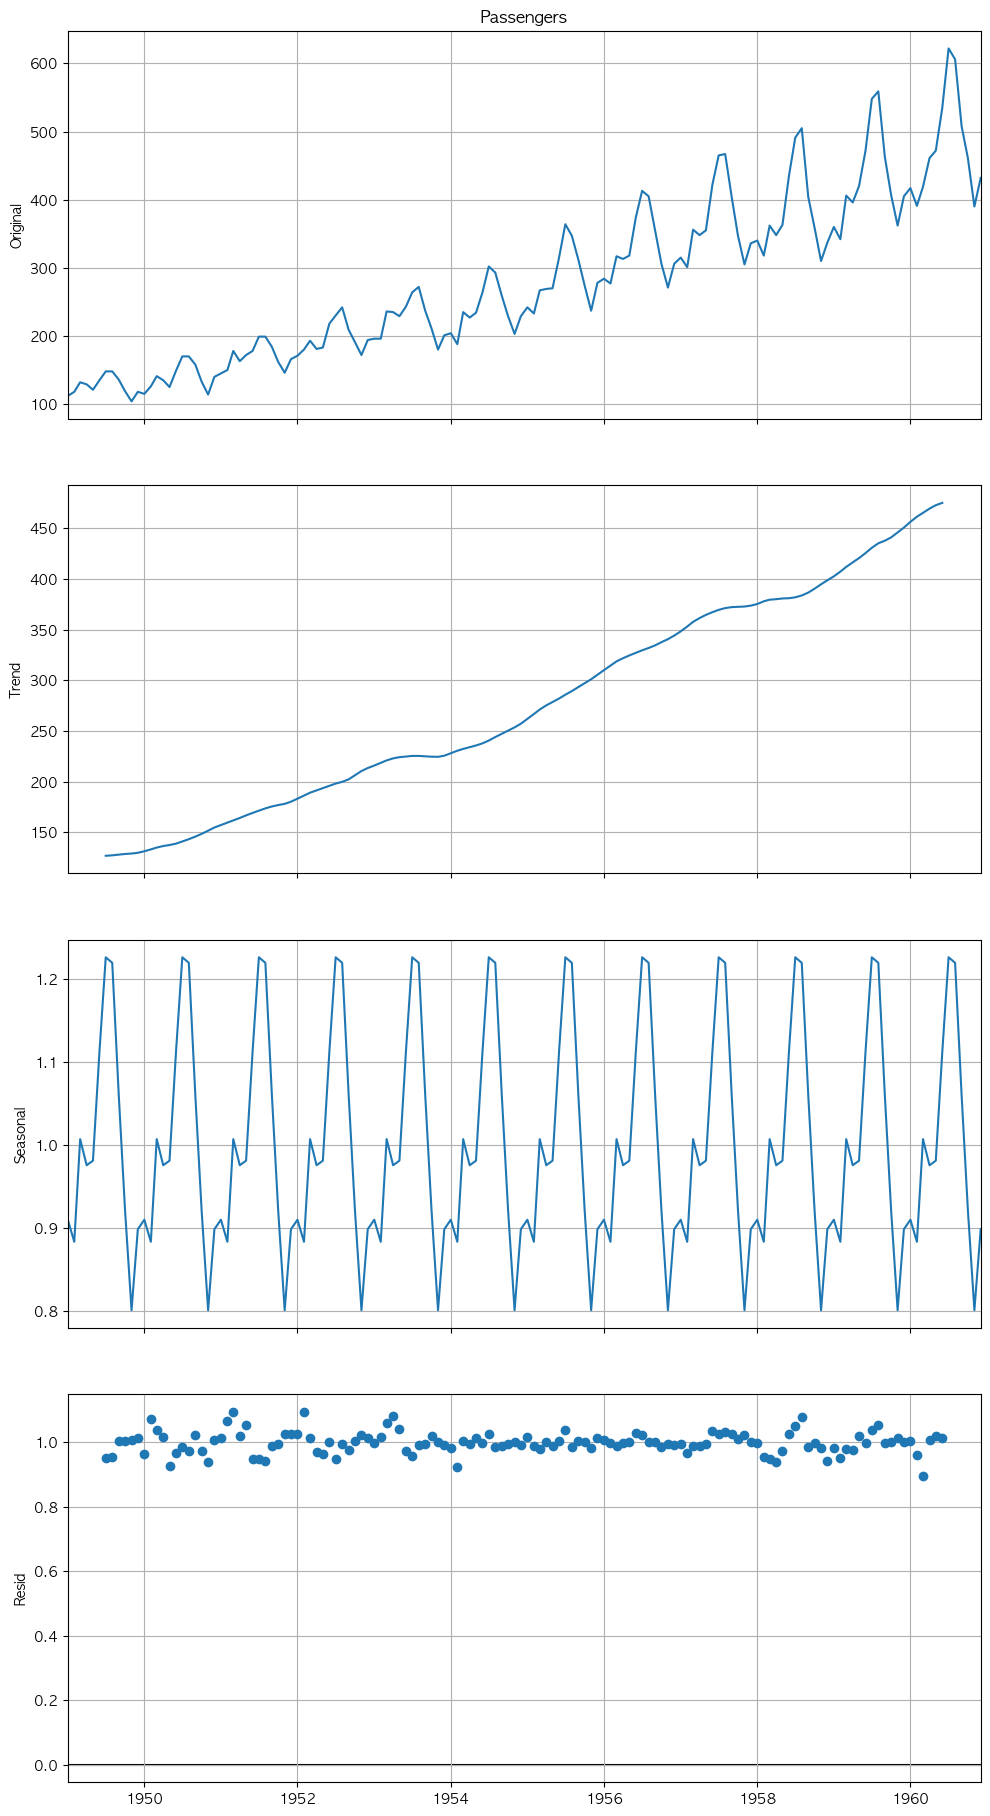

+---------------------+------------+---------+------------+----------+
| Month               |   original |   trend |   seasonal |    resid |
|---------------------+------------+---------+------------+----------|
| 1949-01-01 00:00:00 |        112 |     nan |    0.91023 |      nan |
| 1949-02-01 00:00:00 |        118 |     nan |   0.883625 |      nan |
| 1949-03-01 00:00:00 |        132 |     nan |    1.00737 |      nan |
| 1949-04-01 00:00:00 |        129 |     nan |   0.975906 |      nan |
| 1949-05-01 00:00:00 |        121 |     nan |   0.981378 |      nan |
| 1949-06-01 00:00:00 |        135 |     nan |    1.11278 |      nan |
| 1949-07-01 00:00:00 |        148 | 126.792 |    1.22656 | 0.951664 |
| 1949-08-01 00:00:00 |        148 |  127.25 |    1.21991 | 0.953401 |
| 1949-09-01 00:00:00 |        136 | 127.958 |    1.06049 |  1.00222 |
| 1949-10-01 00:00:00 |        119 | 128.583 |   0.921757 |  1.00403 |
| 1949-11-01 00:00:00 |        104 |     129 |   0.801178 |  1.00627 |
| 1949

In [31]:
sd = my_seasonal_decompose(origin['Passengers'], model="multiplicative")
my_pretty_table(sd)

> 원본 데이터를 분해 했을 때 전반적으로 증가하는 추세(Trend)를 보이고 있으며, 1년 단위로 데이터 패턴이 반복되고 있다(Seasonal). 전체 평균은 1을 기준으로 크게 벗어나지 않는 잔차를 보이는 것으로 보아 분석 결과가 타당해 보인다.